# <center>BikeFlow: Investigating User Behavior in the FordGo Bike Sharing Network</center>
### <center>by</center>
## <center>Shedrack David</center>

## Investigation Overview


This investigation studies when most trips taken in terms of time of day or month of the year and How long average trip take and if this depend on wheather the user is a subscriber or a customer?

FordGo is a regional public bicycle sharing system in California's San Francisco Bay Area. It is operated by Motivate in a partnership with the Metropolitan Transportation Commission and the Bay Area Air Quality Management District. Bay Wheels is 'the first regional and large-scale bicycle sharing system deployed in California and on the West Coast of the United States. It was established as Bay Area Bike Share in August 2013. the system was officially re-launched as Ford GoBike in a partnership with Ford Motor Company. After Motivate's acquisition by Lyft, the system was renamed to Bay Wheels on June 11, 2019. This investigation explores a dataset containing FordGo's trip data for each month in the year 2019.


## Dataset Overview

There are over 2,000,000 trips in the dataset with 9 features:

- duration
- start_time
- end_time
- is_weekend
- user_is_subscriber
- trip_time_of_day
- start_month time_diff
- start_station_name
- end_station_name

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib import rcParams
import seaborn as sns

%matplotlib inline
# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
# load in the dataset into a pandas dataframe
df = pd.read_csv('master_ford_gobike-tripdata.csv')
# Convert dates to datetime format
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])
#creating mask for user_types
customer = df['user_is_subscriber'] == 0
subscriber = df['user_is_subscriber'] == 1

# High-level overview of data shape and composition after wrangling
print('Shape:{}\n'.format(df.shape))
print(df.info())
print()
df.head()

Shape:(2371857, 10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2371857 entries, 0 to 2371856
Data columns (total 10 columns):
 #   Column              Dtype         
---  ------              -----         
 0   duration            float64       
 1   start_time          datetime64[ns]
 2   end_time            datetime64[ns]
 3   is_weekend          int64         
 4   user_is_subscriber  int64         
 5   trip_time_of_day    object        
 6   start_month         object        
 7   time_diff           object        
 8   start_station_name  object        
 9   end_station_name    object        
dtypes: datetime64[ns](2), float64(1), int64(2), object(5)
memory usage: 181.0+ MB
None



,duration,start_time,end_time,is_weekend,user_is_subscriber,trip_time_of_day,start_month,time_diff,start_station_name,end_station_name
0,3.77,2019-01-01 00:07:10.576,2019-01-01 00:10:57.196,0,0,late,January-2019,0 days 00:03:46.620000000,Downtown Berkeley BART,Fulton St at Bancroft Way
1,29.45,2019-01-01 00:08:39.659,2019-01-01 00:38:06.848,0,0,late,January-2019,0 days 00:29:27.189000000,Steuart St at Market St,Jackson Playground
2,3.03,2019-01-01 00:09:56.211,2019-01-01 00:12:58.748,0,1,late,January-2019,0 days 00:03:02.537000000,Telegraph Ave at Carleton St,Haste St at Telegraph Ave
3,9.42,2019-01-01 00:11:03.441,2019-01-01 00:20:29.268,0,1,late,January-2019,0 days 00:09:25.827000000,Telegraph Ave at Carleton St,Bancroft Way at College Ave
4,11.83,2019-01-01 00:14:48.398,2019-01-01 00:26:38.421,0,0,late,January-2019,0 days 00:11:50.023000000,Lake Merritt BART Station,24th St at Market St


In [3]:
# Descriptive statistics
df.describe().round(3)

,duration,is_weekend,user_is_subscriber
count,2371857.000,2371857.000,2371857.000
mean,11.698,0.173,0.807
std,9.020,0.378,0.395
min,1.020,0.000,0.000
25%,5.950,0.000,1.000
50%,9.430,0.000,1.000
75%,14.580,0.000,1.000
max,86.820,1.000,1.000


# <center>Usage Trends and Patterns</center>

## User Groups

FordGo or Bay Wheels differentiate between two user groups; "Subscribers" who are members of an annual or a monthly plan, and "Customers" who pay for each single trip. During the investigation period, 80.7% of users were "Subscribers", while 19.3% were "Customers".

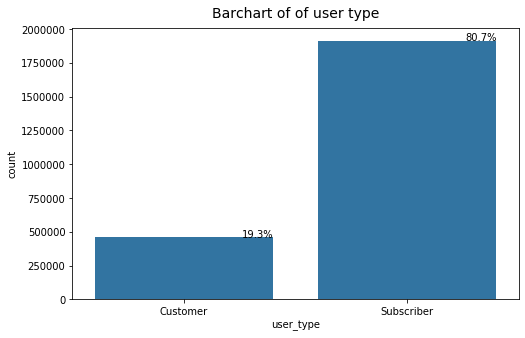

In [5]:
#plot a chart to show user type
plt.figure(figsize=[8, 5])
default_color = sns.color_palette()[0]
ut = sns.countplot(data = df, x = 'user_is_subscriber', color=default_color)

ticks = [0, 1]
labels = ['Customer', 'Subscriber']
plt.xticks(ticks, labels)

plt.xlabel('user_type')
plt.title('Barchart of of user type', fontsize=14, y=1.015)

total = float(len(df))
for p in ut.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ut.annotate(percentage, (x, y),ha='right')

plt.show()

## Time of Day Demand

A question of interest for this analysis is to know when when most trips taken in terms of time of day or month of the year, From investigating the dataset

most trips are taken at late hour of the day

most trips are taken during weekdays rather than weekends. thursdays and tuesdays are the most prefered days to take a trip.

on average, trips on weekends tend to be slightly longer than on weekdays and has less outliers and more spread distribution

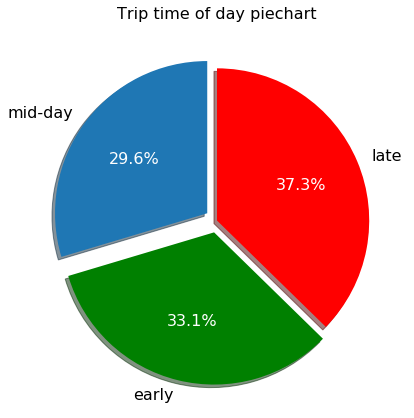

In [8]:
# plotting the pie chart with percentage of time of day 
_, _,  autotexts = plt.pie(df['trip_time_of_day'].value_counts(), labels = ['late', 'early', 'mid-day'], 
        colors=['r', 'g', default_color], startangle = 90, counterclock = False, shadow = True, 
        explode = (0, 0.08, 0.08), radius = 1.0, autopct = '%1.1f%%')
# Change autopct text color to be white
for ins in autotexts:
    ins.set_color('white')
# Set plot title
plt.title('Trip time of day piechart', fontsize=16, y=1.015)
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = 14,9
# showing the plot
plt.show()

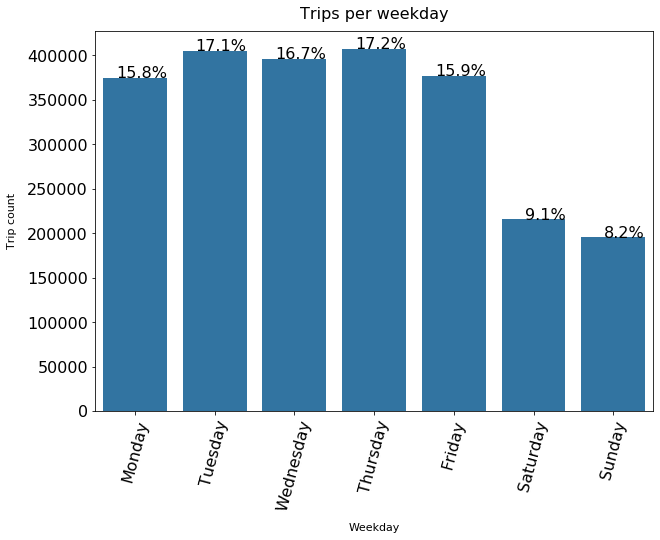

In [7]:
# Bike rides per weekday
rcParams['figure.figsize'] = 10,7
#declaring label for the weekday
weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

wd = sns.countplot(data=df, x=df['start_time'].dt.day_name(), order=weekday, color=default_color)
plt.title('Trips per weekday', fontsize=16, y=1.015)
plt.xlabel('Weekday', labelpad=10, fontsize=11)
plt.ylabel('Trip count', labelpad=10, fontsize=11);

#including percentage value for each bar
total = float(len(df))
for p in wd.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    wd.annotate(percentage, (x, y),ha='right')

plt.xticks(rotation=75);

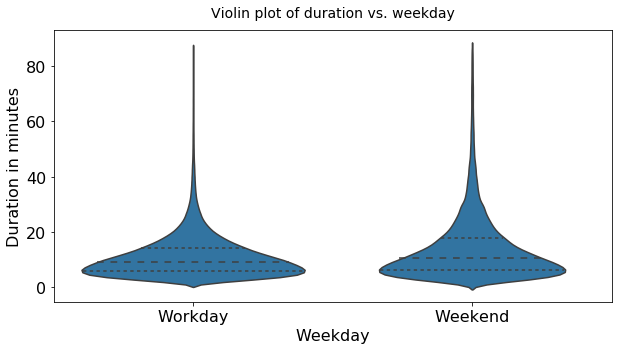

In [8]:
# Violin plot of `duration` vs `is_weekend`
# weekdays tend to have shorter trips
rcParams['figure.figsize'] = 10,5
sns.violinplot(data=df, x='is_weekend', y='duration', color = default_color, inner='quartile')
ticks = [0, 1]
labels = ['Workday', 'Weekend']
plt.xticks(ticks, labels)
plt.title('Violin plot of duration vs. weekday', fontsize=14, y=1.025)
plt.xlabel('Weekday')
plt.ylabel('Duration in minutes');

## Monthly Demand

Most trips were taken in the month of March and April but drastically drops in the month of December.

changes in monthly trips count tended to be similar for both user groups; this pattern persists till November and in the month of December, the number of "Customers" became, higher than this of "Subscribers".

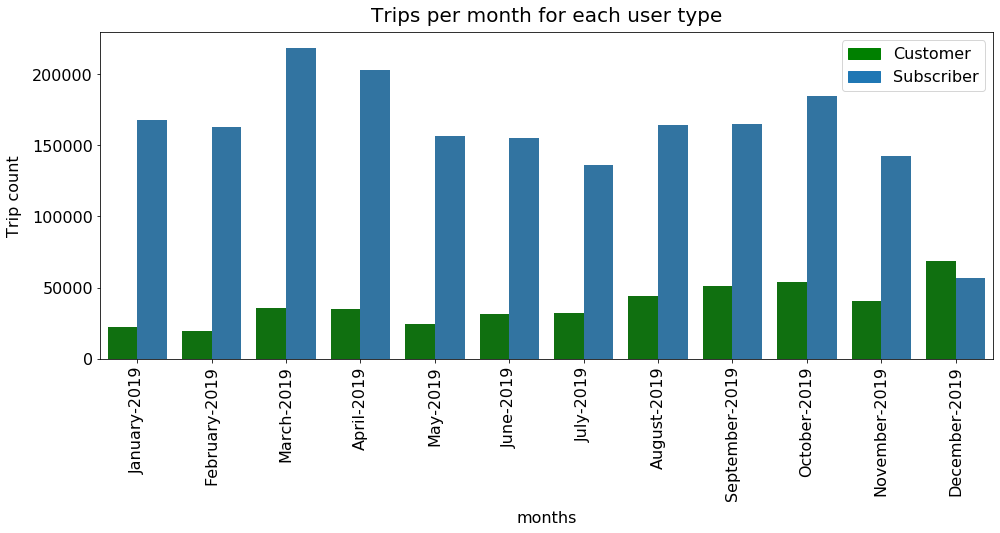

In [10]:
# Bike rides per month for each user type
# Note that this depends on season

rcParams['figure.figsize'] = 16,6
sns.countplot(data=df, x=df['start_month'], hue='user_is_subscriber', palette=['g', default_color])
plt.title('Trips per month for each user type', fontsize=20, y=1.015)
plt.xlabel('months', labelpad=10, fontsize=16)
plt.ylabel('Trip count', labelpad=10, fontsize=16)
#rotating month name 90 degrees
plt.xticks(rotation=90)
# Creating artists specifically for adding to the legend (Proxy artists)
customer_legend = mpatches.Patch(color='g', label='Customer')
subscriber_legend = mpatches.Patch(color=default_color, label='Subscriber')
plt.legend(handles=[customer_legend, subscriber_legend])
plt.show();

## Demand Fluctuations For Both User types

for both users, trips peak around the hours of 8-9am and 5-6pm but drops around 10am - 3pm. though it seems to drop more significantly for subscribers

customer's trips tends to peak on the 12th, 13th and 19th day but seems to drop significantly on the 14th and 15th day, while for subscribers, it peaks on the 11th and 12th day but drops on the 15th and 27th day

subscribers trips peaks mostly on weekdays but significantly drops on weekends while customers demand seem consistent accross the entire week, we could assume that most subscribers use bikes to and from their works based on our findings for trips per hour

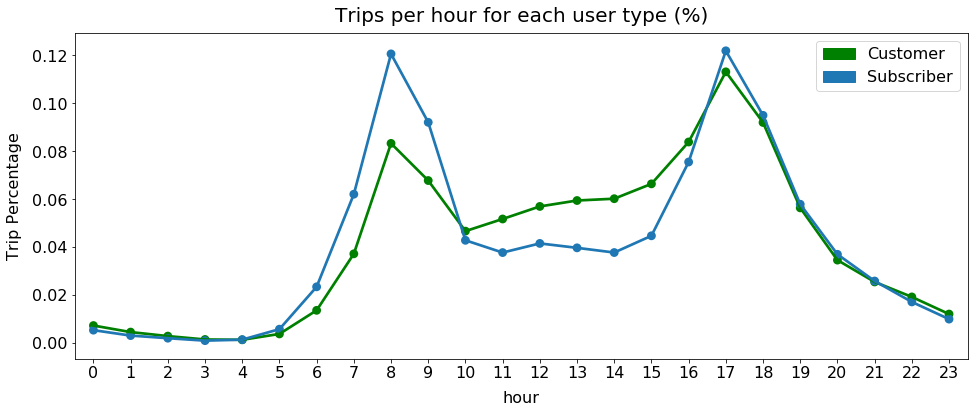

In [11]:
# Hours with most trips per user type
customer_hourly_trips = (df.start_time[customer].dt.hour.value_counts().sort_index())/df[customer].shape[0]
subscriber_hourly_trips = (df.start_time[subscriber].dt.hour.value_counts().sort_index())/df[subscriber].shape[0]

# Point plot for hourly rides per user type
rcParams['figure.figsize'] = 16,6
fig, ax = plt.subplots()
sns.pointplot(x=customer_hourly_trips.index, y=customer_hourly_trips.values, color='g')
sns.pointplot(x=subscriber_hourly_trips.index, y=subscriber_hourly_trips.values, color=default_color)
plt.title('Trips per hour for each user type (%)', fontsize=20, y=1.015)
plt.xlabel('hour', labelpad=10, fontsize=16)
plt.ylabel('Trip Percentage', labelpad=10, fontsize=16)

# Creating artists specifically for adding to the legend (Proxy artists)
customer_legend = mpatches.Patch(color='g', label='Customer')
subscriber_legend = mpatches.Patch(color=default_color, label='Subscriber')
plt.legend(handles=[customer_legend, subscriber_legend])
plt.show();

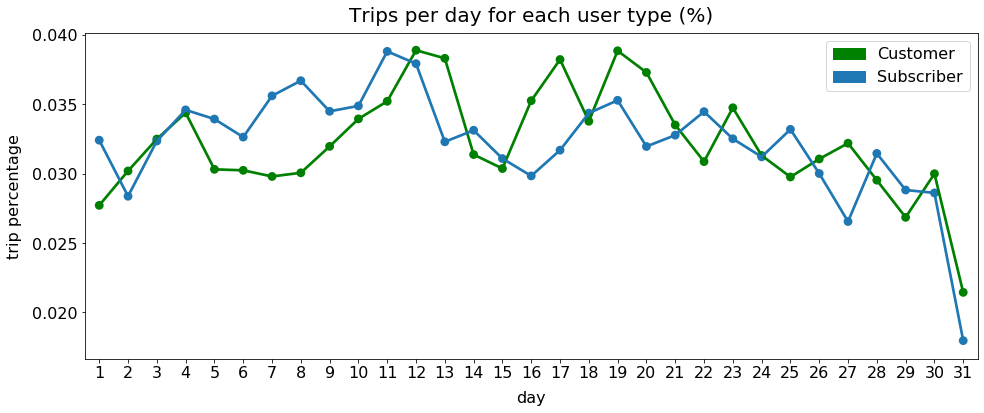

In [12]:
# Days with most trips per user type
customer_daily_trips = (df.start_time[customer].dt.day.value_counts().sort_index())/df[customer].shape[0]
subscriber_daily_trips = (df.start_time[subscriber].dt.day.value_counts().sort_index())/df[subscriber].shape[0]

# Point plot for daily rides per user type
rcParams['figure.figsize'] = 16,6
fig, ax = plt.subplots()
sns.pointplot(x=customer_daily_trips.index, y=customer_daily_trips.values, color='g')
sns.pointplot(x=subscriber_daily_trips.index, y=subscriber_daily_trips.values, color=default_color)
plt.title('Trips per day for each user type (%)', fontsize=20, y=1.015)
plt.xlabel('day', labelpad=10, fontsize=16)
plt.ylabel('trip percentage', labelpad=10, fontsize=16)

# Creating artists specifically for adding to the legend (Proxy artists)
customer_legend = mpatches.Patch(color='g', label='Customer')
subscriber_legend = mpatches.Patch(color=default_color, label='Subscriber')
plt.legend(handles=[customer_legend, subscriber_legend])
plt.show();

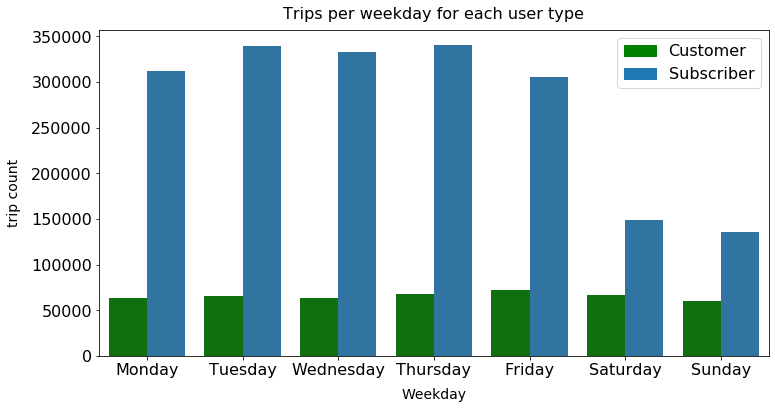

In [13]:
# Bike rides per weekday for each user type
rcParams['figure.figsize'] = 12,6
weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.countplot(data=df, x=df['start_time'].dt.day_name(), hue='user_is_subscriber', order=weekday, palette=['g', default_color])
plt.title('Trips per weekday for each user type', fontsize=16, y=1.015)
plt.xlabel('Weekday', labelpad=10, fontsize=14)
plt.ylabel('trip count', labelpad=10, fontsize=14)

# Creating artists specifically for adding to the legend (Proxy artists)
customer_legend = mpatches.Patch(color='g', label='Customer')
subscriber_legend = mpatches.Patch(color=default_color, label='Subscriber')
plt.legend(handles=[customer_legend, subscriber_legend])
plt.show();

# <center>Determinants of Trip Duration</center>

## Distribution of Trip Durations

Trip durations in the dataset ranges from 1minute to about 90minutes. The distribution is right-skewed on a linear scale but when plotted on a logarithmic scale, the distribution of trip durations gets closer to normal but with a rough shape.

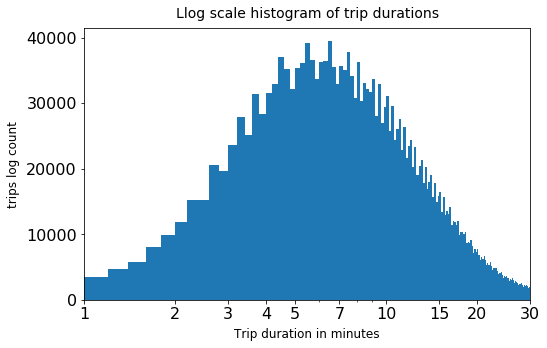

In [14]:
# Apply log scale to the x-axis, increase bin size
plt.figure(figsize=[8, 5])
bins = np.arange(0, 100, 0.2)
ticks = [1, 2, 3, 4, 5, 7, 10, 15, 20, 30, 50, 85]
labels = ['{}'.format(v) for v in ticks]
plt.hist(data = df, x = 'duration', bins=bins);
plt.xscale('log')
plt.xticks(ticks, labels);
plt.xlim((1,30));
plt.title('Llog scale histogram of trip durations', fontsize=14, y=1.015)
plt.xlabel('Trip duration in minutes', labelpad=6, fontsize=12)
plt.ylabel('trips log count', labelpad=6, fontsize=12)
plt.show()

## Trip Duration and User Groups Usage Through the Week/Month

Customers tend to have more duration in their trips than Subscribers and their distribution also have more spread compared to Subscribers. In other words, Customers tend to vary their trip durations, while Subscribers mostly use the service for short trips.

Duration distribution has more spread on weekends for both user types but is more apparent for Customers, and the meadian trip duration for Customers has more spread which means Customers tend, on average, to take longer trips, and their trips' durations vary more compared to Subscribers.

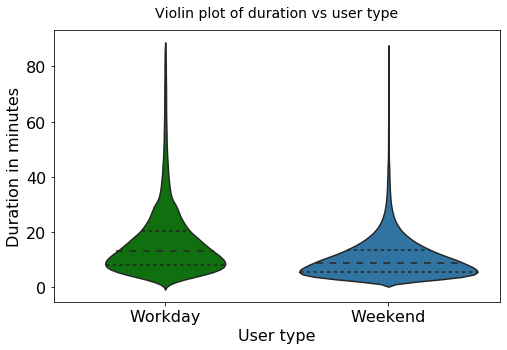

In [19]:
# Violin plot of `is_subscriber` vs `duration`
rcParams['figure.figsize'] = 8,5
sns.violinplot(data=df, x='user_is_subscriber', y='duration', inner='quartile', palette=['g', default_color])

plt.xticks(ticks, labels)
plt.title('Violin plot of duration vs user type', fontsize=14, y=1.025)
plt.xlabel('User type')
plt.ylabel('Duration in minutes');
plt.show()


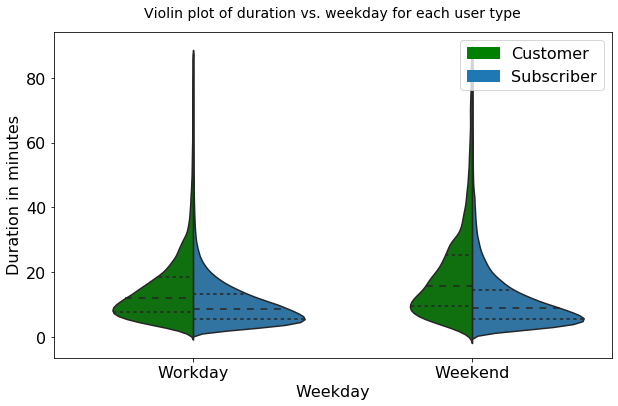

In [16]:
# Violin plot of `is_weekend` vs `duration` for each user type
rcParams['figure.figsize'] = 10,6
sns.violinplot(data=df, x='is_weekend', y='duration', hue='user_is_subscriber', inner='quartile', palette=['g', default_color], split=True)
ticks = [0, 1]
labels = ['Workday', 'Weekend']
plt.xticks(ticks, labels)
plt.title('Violin plot of duration vs. weekday for each user type', fontsize=14, y=1.025)
plt.xlabel('Weekday')
plt.ylabel('Duration in minutes')
# Creating artists specifically for adding to the legend (Proxy artists)
customer_legend = mpatches.Patch(color='g', label='Customer')
subscriber_legend = mpatches.Patch(color=default_color, label='Subscriber')
plt.legend(handles=[customer_legend, subscriber_legend])
plt.show();

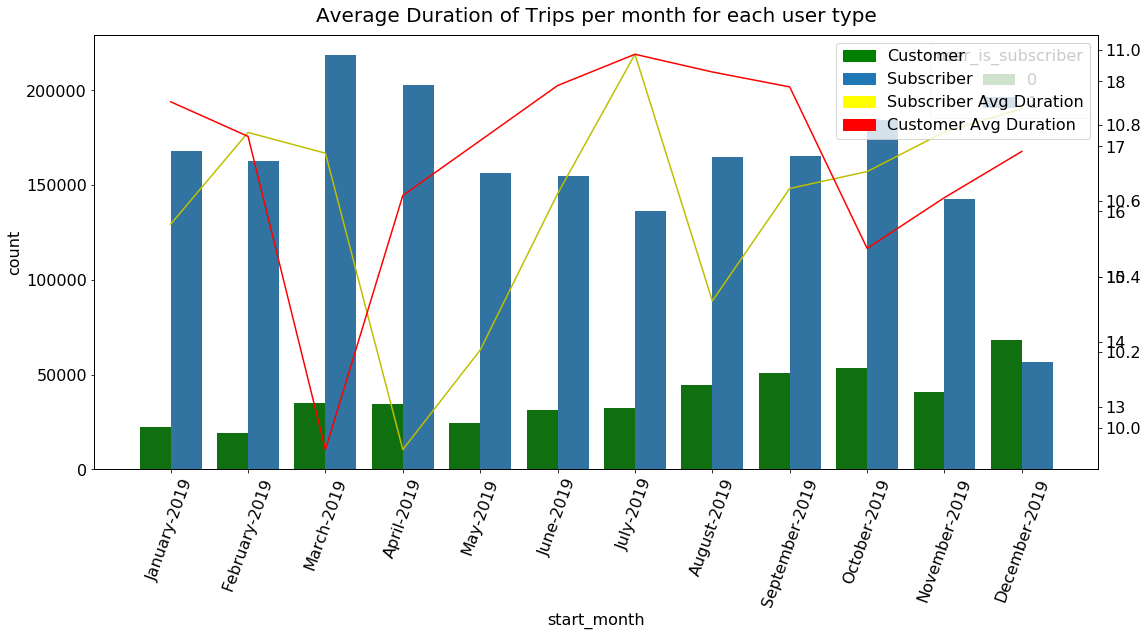

In [17]:
#creating temporal features for user types
df["customer_durations"] = df.duration[customer]
df["subscriber_durations"] = df.duration[subscriber]

#grouping mean duration for each user type
customer_avg_duration = df.groupby(["start_month"]).agg(mean_duration=("customer_durations", "mean"))
subscriber_avg_duration = df.groupby(["start_month"]).agg(mean_duration=("subscriber_durations", "mean"))

c = np.array(customer_avg_duration)
s = np.array(subscriber_avg_duration) 
#ploting chart
rcParams['figure.figsize'] = 18,8
g = sns.countplot(data=df, x=df['start_month'], hue='user_is_subscriber', palette=['g', default_color])
plt.title('Average Duration of Trips per month for each user type', fontsize=20, y=1.015)
#rotating month name 90 degrees
plt.xticks(rotation=70)

#creating secondary y axis
ax = g.twinx()
ax.plot(s, color='y')
ax2 = g.twinx()
ax2.plot(c, color='r')

# Creating artists specifically for adding to the legend (Proxy artists)
customer_legend = mpatches.Patch(color='g', label='Customer')
subscriber_legend = mpatches.Patch(color=default_color, label='Subscriber')
customer_trips_duration_legend = mpatches.Patch(color='r', label='Customer Avg Duration')
subscriber_trips_duration = mpatches.Patch(color='yellow', label='Subscriber Avg Duration')

plt.xlabel('months', labelpad=10, fontsize=16)
plt.legend(handles=[customer_legend, subscriber_legend, subscriber_trips_duration, customer_trips_duration_legend])
#plt.tight_layout()
plt.show();

In [2]:
# Create HTML slides without showing the code:
!jupyter nbconvert FordGo_Explanatory_Analysis.ipynb --to slides --no-input

[NbConvertApp] Converting notebook FordGo_Explanatory_Analysis.ipynb to slides
[NbConvertApp] Writing 1255281 bytes to FordGo_Explanatory_Analysis.slides.html
